Vigneshraj V

Data Science Intern-LGMVIP

Task-1: Exploratory Data Analysis- Terrorism

INTERMEDIATE LEVEL

Dataset:globalterrorismdb_0718dist.csv (https://bit.ly/2TK5Xn5)

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [4]:
df=pd.read_csv("globalterrorismdb_0718dist.csv", low_memory=False, encoding='latin-1')

In [6]:
print("Showing part of the whole dataset:")
df.head(5)

Showing part of the whole dataset:


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,1.0,Assassination,NaN,NaN,NaN,NaN,14.0,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,6.0,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7.0,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,1.0,Assassination,NaN,NaN,NaN,NaN,10.0,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,3.0,Bombing/Explosion,NaN,NaN,NaN,NaN,7.0,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0.0,NaN,NaN,1.0,1.0,1.0,-9.0,NaN,NaN,0.0,1.0,0.0,7.0,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7.0,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [7]:
df.shape

(1210, 135)

In [8]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1210 entries, 0 to 1209
Columns: 135 entries, eventid to related
dtypes: float64(79), int64(7), object(49)
memory usage: 1.2+ MB


In [10]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,attacktype3_txt,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,gsubname2,gname3,gsubname3,guncertain1,guncertain2,guncertain3,individual,nperps,...,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.210000e+03,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1190.000000,1190.000000,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000,232.000000,1209.000000,1209.000000,1209.0,1209.000000,7.000000,0.0,0.0,1209.000000,1161.000000,1204.000000,34.000000,30.000000,32.000000,1.0,1.0,1.0,0.0,0.0,0.0,1209.000000,1.0,0.0,1209.000000,660.000000,...,0.0,0.0,0.0,0.0,1209.000000,1055.000000,55.000000,47.000000,2.000000,2.000000,0.0,0.0,0.0,0.0,1095.000000,575.000000,576.000000,973.000000,574.000000,567.000000,1209.000000,695.000000,3.110000e+02,1209.000000,83.000000,83.000000,32.000000,29.000000,1206.000000,3.800000e+01,0.0,7.000000,0.0,0.0,57.000000,44.000000,1209.000000,1209.000000,1209.000000,1209.000000
mean,1.970593e+11,1970.534711,5.662810,14.782645,0.029752,248.118182,3.382645,34.806398,-59.408396,1.075269,0.005790,0.999173,0.998346,0.914806,-0.530190,1.560345,0.104218,0.859388,0.0,3.837883,4.285714,NaN,NaN,5.617866,34.703704,201.970930,8.852941,47.233333,219.750000,7.0,45.0,161.0,NaN,NaN,NaN,0.068652,1.0,NaN,0.002481,-66.033333,...,NaN,NaN,NaN,NaN,6.738627,15.699526,6.854545,10.021277,9.000000,12.500000,NaN,NaN,NaN,NaN,0.400000,0.076522,0.036458,0.548818,0.315331,0.001764,0.301075,3.187050,1.230074e+05,0.068652,3.746988,-0.771084,1.281250,20.793103,0.031509,1.991316e+05,NaN,116714.285714,NaN,NaN,2.456140,19.954545,-4.604632,-4.496278,0.277916,-3.555831
std,6.215254e+07,0.628153,3.295036,9.185877,0.169973,139.745770,3.410905,20.475755,55.349643,0.529080,0.075902,0.028760,0.040656,0.279286,2.532757,0.506046,0.305670,0.347765,0.0,2.034110,2.563480,NaN,NaN,5.176316,26.224891,62.142825,6.453246,27.692503,12.949032,NaN,NaN,NaN,NaN,NaN,NaN,0.252966,NaN,NaN,0.049772,48.014244,...,NaN,NaN,NaN,NaN,1.955085,7.547933,2.231244,7.505040,5.656854,14.849242,NaN,NaN,NaN,NaN,2.239091,0.340713,0.251030,4.933814,1.867292,0.041996,1.983877,0.435598,4.771338e+05,0.252966,53.421893,11.019191,4.834249,44.567268,0.174762,8.200946e+05,NaN,131347.775372,NaN,NaN,0.946236,49.230806,4.553673,4.680366,0.757206,4.793283
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,11.000000,1.000000,-37.813187,-157.818968,1.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.0,1.000000,2.000000,NaN,NaN,1.000000,1.000000,11.000000,1.000000,1.000000,161.000000,7.0,45.0,161.0,NaN,NaN,NaN,0.000000,1.0,NaN,0.000000,-99.000000,...,NaN,NaN,NaN,NaN,2.000000,1.000000,5.000000,2.000000,5.000000,2.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,2.000000,0.000000e+00,0.000000,-99.000000,-99.000000,0.000000,0.000000,0.000000,0.000000e+00,NaN,12000.000000,NaN,NaN,2.000000,1.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.970053e+11,1970.000000,3.000000,6.000000,0.000000,217.000000,1.000000,34.097866,-95.365295,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.0,3.000000,2.000000,NaN,NaN,2.000000,15.000000,217.000000,3.000000,23.500000,217.000000,7.0,45.0,161.0,NaN,NaN,NaN,0.000000,1.0,NaN,0.000000,-99.000000,...,NaN,NaN,NaN,NaN,6.000000,14.000000,5.000000,3.000000,7.000000,7.250000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [11]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [12]:
df.isnull().sum()

eventid          0
iyear            0
imonth           0
iday             0
approxdate    1198
              ... 
INT_LOG          1
INT_IDEO         1
INT_MISC         1
INT_ANY          1
related       1084
Length: 135, dtype: int64

In [13]:
missing_percentage = df.isnull().sum()*100 /len(df)
print(missing_percentage)

eventid        0.000000
iyear          0.000000
imonth         0.000000
iday           0.000000
approxdate    99.008264
                ...    
INT_LOG        0.082645
INT_IDEO       0.082645
INT_MISC       0.082645
INT_ANY        0.082645
related       89.586777
Length: 135, dtype: float64


In [22]:
missing_data = df.isnull()
missing_data.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,True,True,False,False,False,False,False,True,True,True,True,False,False,False,False,True,False,...,True,True,True,False,True,True,False,True,True,False,True,True,True,True,False,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,True
1,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,True,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,...,True,True,True,False,True,True,False,True,True,False,True,True,True,True,False,False,False,True,True,True,False,False,False,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,True
2,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,True,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,...,True,True,True,False,True,True,False,True,True,False,True,True,True,True,False,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,True
3,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,True,False,False,False,False,False,True,True,True,True,False,False,False,False,True,False,...,True,True,False,True,True,True,True,True,True,False,True,True,True,True,False,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,True
4,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,True,False,False,False,False,False,True,True,True,True,False,False,False,False,True,False,...,True,True,False,True,True,True,True,True,True,False,True,True,True,True,False,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,True


In [27]:
missing_data.shape

(1210, 135)

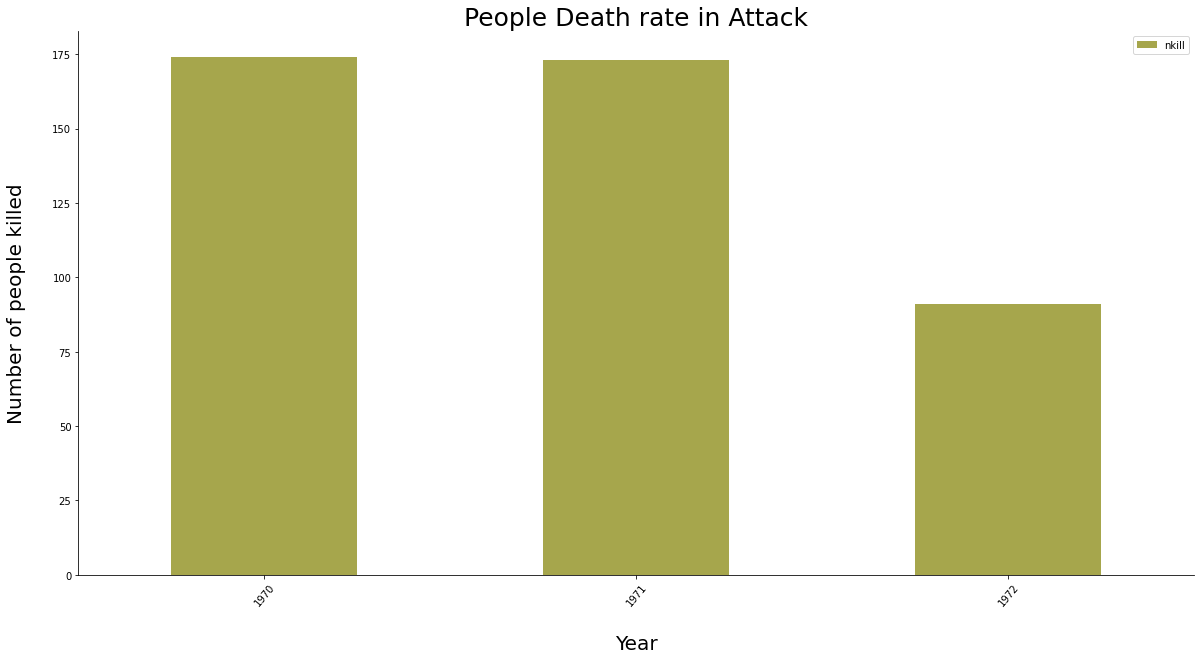

In [31]:
data = df[['iyear','nkill']].groupby(['iyear']).sum()
fig, ax4 = plt.subplots(figsize=(20,10))
data.plot(kind='bar',alpha=0.7,ax=ax4,color='olive')
plt.xticks(rotation = 50)
plt.title("People Death rate in Attack",fontsize=25)
plt.ylabel("Number of people killed\n",fontsize=20)
plt.xlabel('\nYear',fontsize=20)
top_side = ax4.spines["top"]
top_side.set_visible(False)
right_side = ax4.spines["right"]
right_side.set_visible(False)

In [32]:
print('Out of {} there are {} columns with missing value'.format(data.shape[1],len(colm)))

Out of 1 there are 106 columns with missing value


In [34]:
country = df.head(10)

No handles with labels found to put in legend.


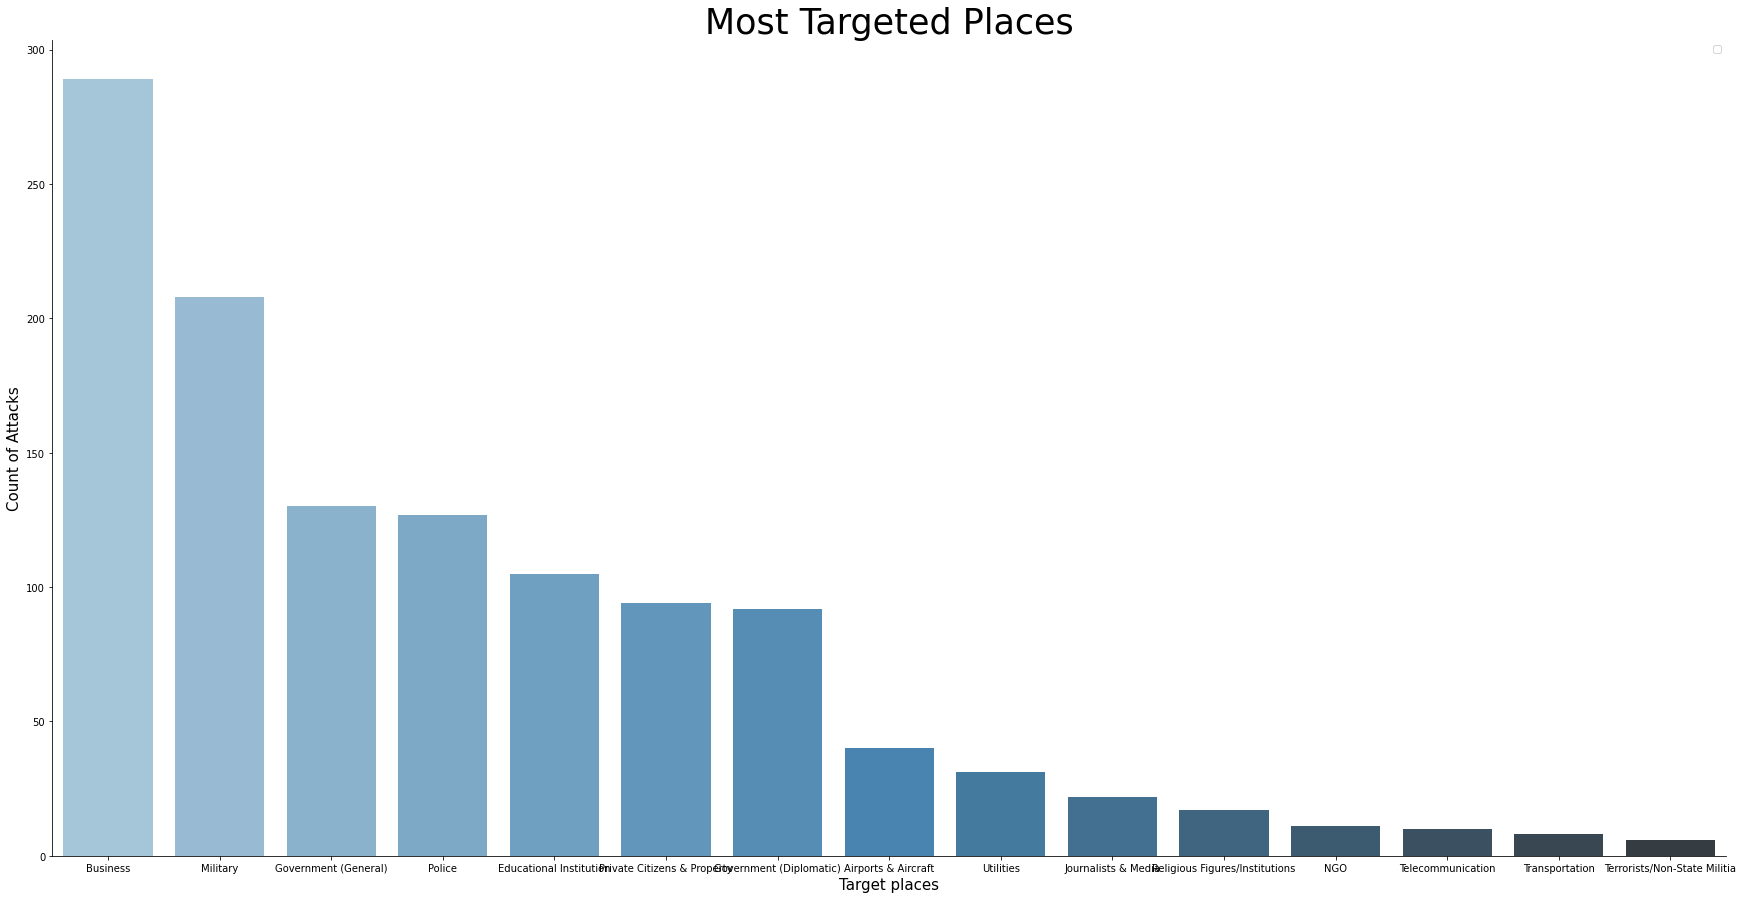

In [38]:
target_type= df['targtype1_txt'].value_counts().reset_index().rename(columns={'index': 'Target Types'})
target_type.columns.values[1] = 'Count'

fig,ax = plt.subplots(figsize=(30, 15))
sns.despine()

sns.barplot(x="Target Types",y="Count",data=target_type.head(15),palette="Blues_d")

ax.set_title('Most Targeted Places',fontsize=35)
ax.set_ylabel(ylabel = 'Count of Attacks',fontsize = 15)
ax.set_xlabel(xlabel = 'Target places',fontsize = 15)

ax.legend();

In [39]:
years= df['iyear'].value_counts().reset_index()
years.columns.values[1] = 'Count of Attacks'
years.head()

,index,Count of Attacks
0,1970,651
1,1971,471
2,1972,88


In [40]:
weapons= df['weaptype1_txt'].value_counts().reset_index()
weapons.columns.values[1] = 'Count of Attacks'

No handles with labels found to put in legend.


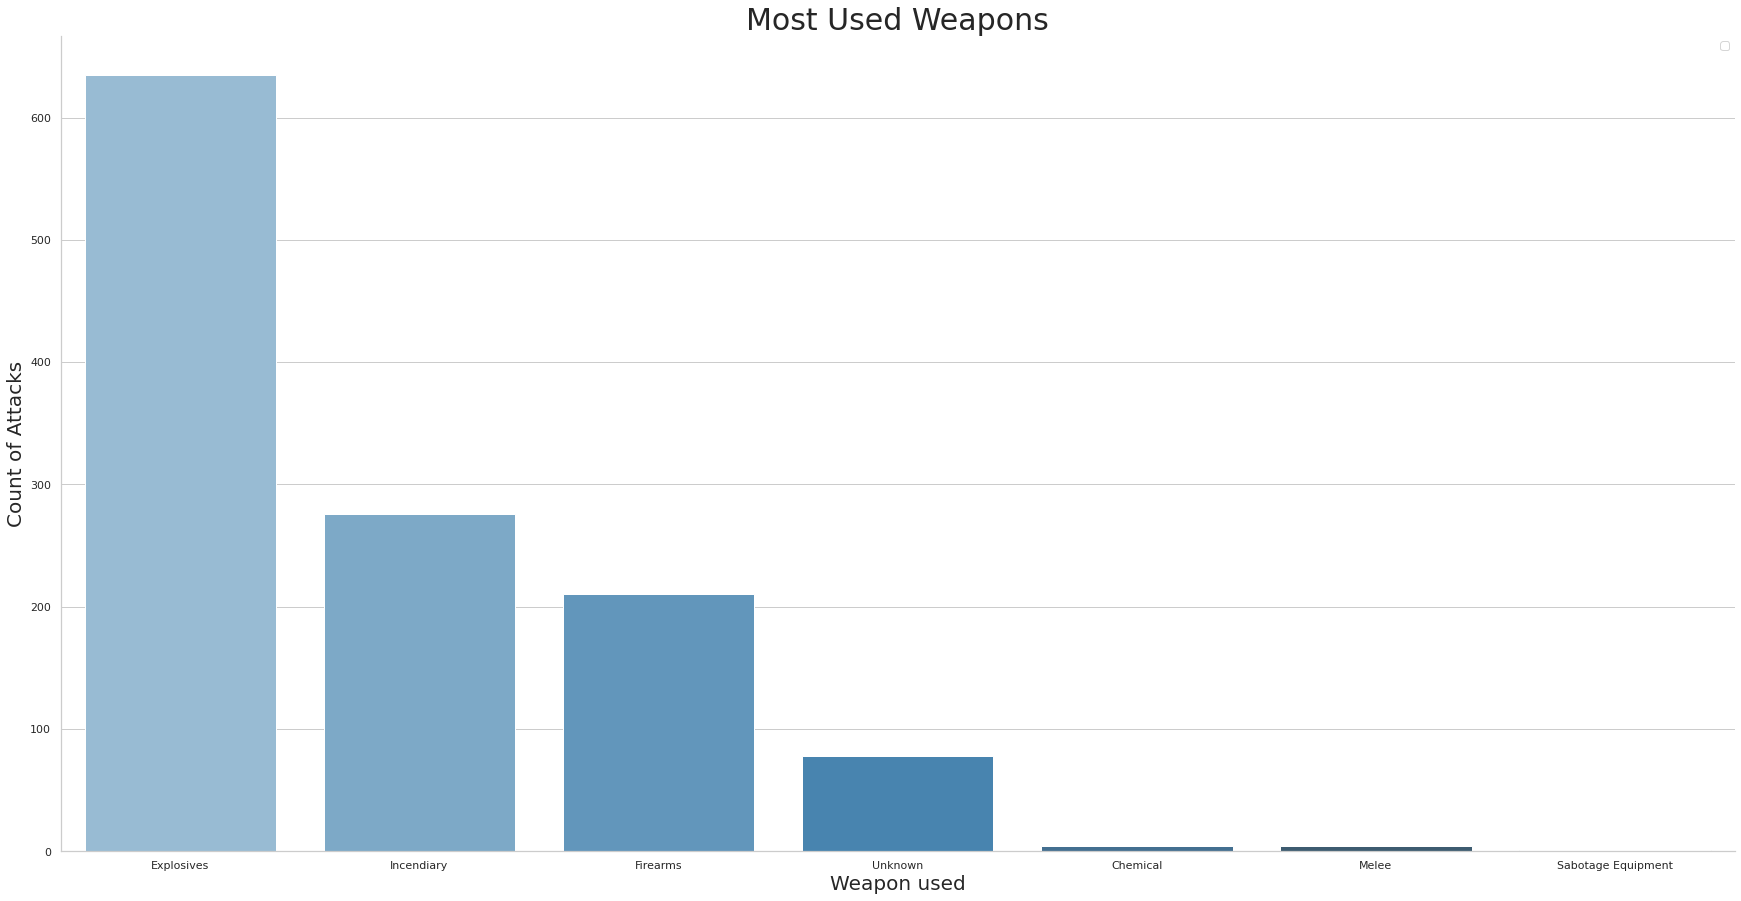

In [41]:
sns.set(style='whitegrid')
fig,ax = plt.subplots(figsize=(30,15))
sns.despine()
sns.barplot(x="index", y="Count of Attacks", data=weapons.head(7),palette="Blues_d")

ax.set_title('Most Used Weapons',fontsize=30)
ax.set_ylabel(ylabel = 'Count of Attacks', fontsize =20)
ax.set_xlabel(xlabel = 'Weapon used', fontsize =20)

ax.legend();

In [42]:
top_city = df.city.value_counts().reset_index().rename(columns={'index': 'City Name'})
top_city.columns.values[1] = 'Count of Attacks'
top_city = top_city.head(10)

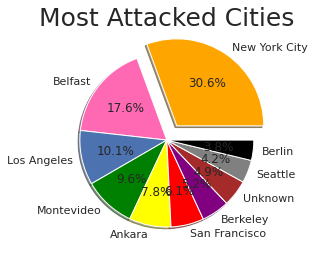

In [45]:
plt.title('Most Attacked Cities',fontsize=25)
explode = (0.2,0,0,0,0,0,0,0,0,0)
mycolors=["orange","hotpink","b","green","yellow","red","purple","brown","grey","black"]
plt.pie(top_city['Count of Attacks'], labels=top_city['City Name'],shadow=True,explode=explode,colors=mycolors,autopct='%1.1f%%')
plt.show()